In [1]:
from utils import mnist_reader 

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
data_folder = "./data"
train_images, train_labels = mnist_reader.load_mnist(data_folder, "train")
test_images, test_labels = mnist_reader.load_mnist(data_folder, "t10k")

train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1,28,28)



In [4]:
import numpy as np

import seaborn as sns

In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import keras
import tensorflow as tf 

In [8]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [9]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [10]:
train_labels[0]

9

In [11]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
fashion_product_labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fashion_product_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


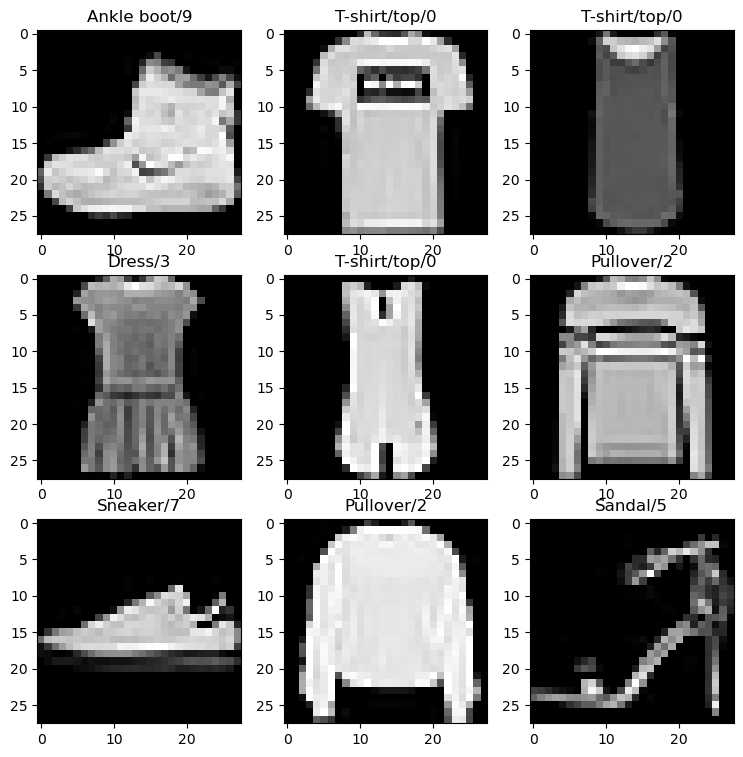

In [13]:
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

pyplot.figure(figsize=(9,9))
for i in range(9):

 pyplot.subplot(330 + 1 + i)
 
 pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
 pyplot.title('{}/{}'.format(fashion_product_labels[train_labels[i]], train_labels[i]))
 

pyplot.show()

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_images.ndim

3

In [16]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [17]:
train_images.ndim

4

In [18]:
train_images.shape


(60000, 28, 28, 1)

In [19]:
test_images.shape

(10000, 28, 28, 1)

In [20]:
train_images.ndim

4

In [21]:
test_images.ndim

4

In [22]:
train_images = train_images/255
test_images = test_images/255

In [23]:
from sklearn.model_selection import train_test_split
train_images,test_images,train_labels,test_labels = train_test_split(train_images,train_labels,test_size=0.2,random_state=2020)

In [24]:
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [25]:
import keras


In [26]:
model= keras.models.Sequential([
    
       tf.keras.layers.Conv2D(filters=12,kernel_size=2,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=36,activation='relu'),
       tf.keras.layers.Dropout(0.25),
       tf.keras.layers.Dense(units=10,activation='softmax')
        ])

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(train_images,train_labels,epochs=10,batch_size=16,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.5675 - accuracy: 0.7997 - val_loss: 0.3802 - val_accuracy: 0.8651
Epoch 2/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3993 - accuracy: 0.8575 - val_loss: 0.3323 - val_accuracy: 0.8818
Epoch 3/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3548 - accuracy: 0.8719 - val_loss: 0.3149 - val_accuracy: 0.8889
Epoch 4/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3253 - accuracy: 0.8838 - val_loss: 0.3000 - val_accuracy: 0.8908
Epoch 5/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3079 - accuracy: 0.8871 - val_loss: 0.2876 - val_accuracy: 0.8982
Epoch 6/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2902 - accuracy: 0.8940 - val_loss: 0.2915 - val_accuracy: 0.8966
Epoch 7/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2807 - accuracy: 0.8974 - val_loss: 0.2870 - val_accura

In [29]:
y_pred = model.predict(test_images)

375/375 [==============================] - 1s 2ms/step


In [30]:
model.evaluate(test_images,test_labels)

375/375 [==============================] - 1s 2ms/step - loss: 0.2847 - accuracy: 0.9020


[0.2847369313240051, 0.9020000100135803]

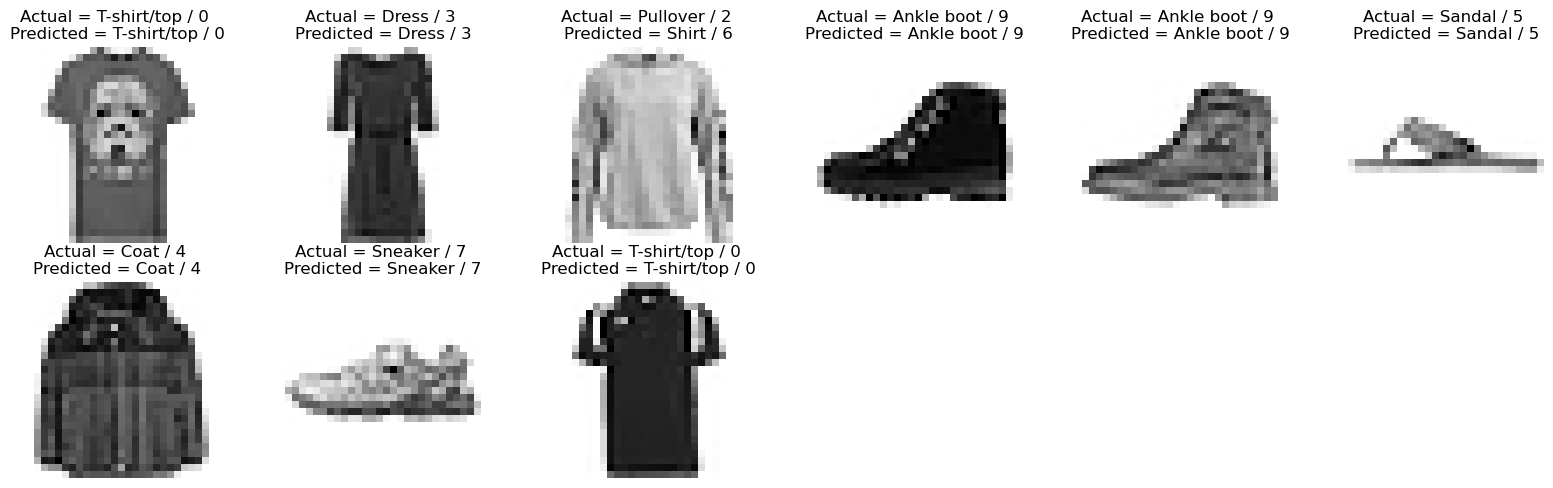

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))

j=1
for i in range(9):
  plt.subplot(10,6, j)
  j+=1
  plt.imshow(test_images[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(fashion_product_labels[test_labels[i]], test_labels[i],fashion_product_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<AxesSubplot:>

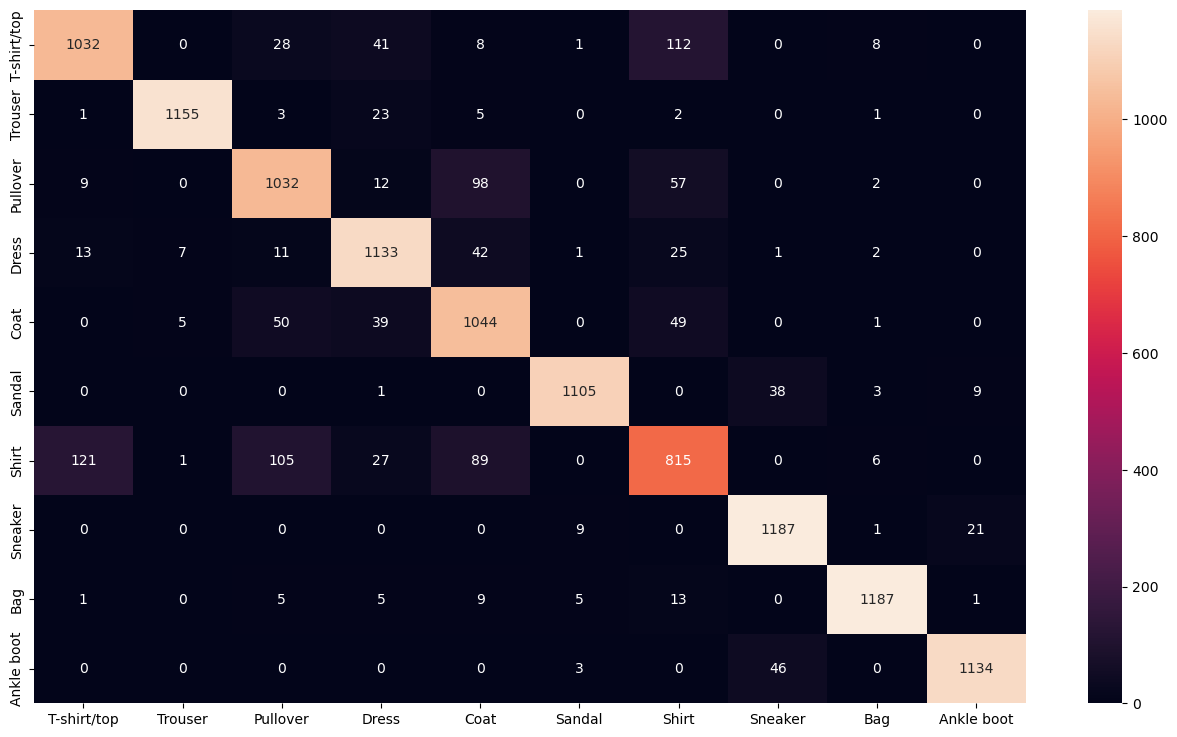

In [32]:
from sklearn.metrics import confusion_matrix

pyplot.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred]
cm=confusion_matrix(test_labels,y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=fashion_product_labels, yticklabels=fashion_product_labels)

In [33]:
from sklearn.metrics import classification_report
cr= classification_report(test_labels,y_pred_labels,target_names=fashion_product_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86      1230
     Trouser       0.99      0.97      0.98      1190
    Pullover       0.84      0.85      0.84      1210
       Dress       0.88      0.92      0.90      1235
        Coat       0.81      0.88      0.84      1188
      Sandal       0.98      0.96      0.97      1156
       Shirt       0.76      0.70      0.73      1164
     Sneaker       0.93      0.97      0.95      1218
         Bag       0.98      0.97      0.97      1226
  Ankle boot       0.97      0.96      0.97      1183

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [34]:
model.save('deep_learning_model.h5')

In [35]:
deep_learning_model = tf.keras.models.load_model('deep_learning_model.h5')

In [36]:
new_y_pred_sample = deep_learning_model.predict(np.expand_dims(test_images[0], axis=0)).round(2)
np.argmax(new_y_pred_sample[0])

1/1 [==============================] - 0s 206ms/step


0

In [37]:
test_labels[0]

0